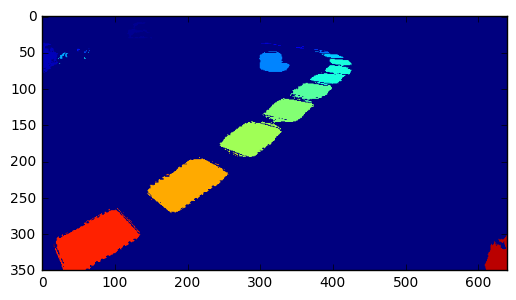

NEW OBJECT:
31
29
0.935483870968
NEW OBJECT:
78
21
0.269230769231
NEW OBJECT:
77
40
0.519480519481
NEW OBJECT:
58
16
0.275862068966
NEW OBJECT:
95
35
0.368421052632
NEW OBJECT:
119
48
0.403361344538
NEW OBJECT:
147
57
0.387755102041
NEW OBJECT:
194
66
0.340206185567
NEW OBJECT:
271
79
0.291512915129
NEW OBJECT:
349
106
0.303724928367
NEW OBJECT:
349
29
0.0830945558739
0.200847148895


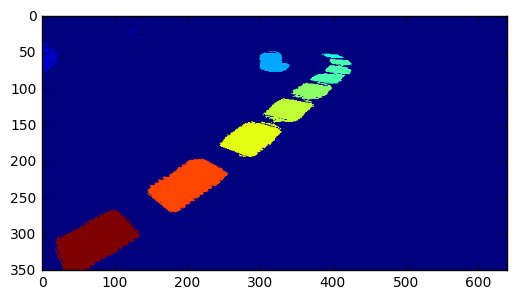

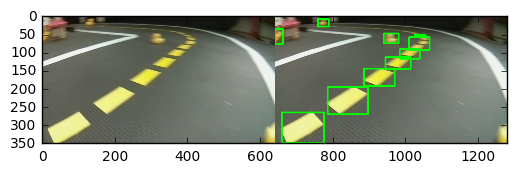

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from skimage import measure


start = time.time()
filename = '/home/niggi/savior_bags/13_pics/21.jpg'
im1 = cv2.imread(filename) #reads BGR
im1_cropped = im1[130:,:,:]
im1_orig=np.copy(im1_cropped)
#plt.imshow(im1_cropped); plt.show()

#BREITE DER ENTE EVT AUSNUTZEN!!! oder evt: breite der breitesten stelle vs breite der schmalsten oder so^^
# Convert BGR to HSV
hsv = cv2.cvtColor(im1_cropped, cv2.COLOR_BGR2HSV)
#plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)); plt.show()

#FILTER IMAGE
lower_yellow = np.array([20,75,100])
upper_yellow = np.array([40,255,255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
#plt.imshow(mask, cmap='gray'); plt.show()

#evt pre process image through blurring,...
blur2 = cv2.blur(mask,(8,4),0)
super_threshold_indices = blur2 < 1
blur2[super_threshold_indices] = 0 #wie in matlab da wo alle=1 werden sie auf 0 gesetzt!!!
super_threshold_indices = blur2 >= 1
blur2[super_threshold_indices] = 255
#plt.imshow(blur2, cmap='gray'); plt.show()

#--------------------SEGMENT AND EVALUATE-----------------------------------------------------------------
#DIESES MAL UNTEN RECHTS ANFANGEN!!!!

#ÜBERPRÜFUNG OB NACH GELBFILTER WAS ÜBRIGGEBLIEBEN IST:
if(np.sum(mask)!=0):
    final=measure.label(mask)
    plt.imshow(final); plt.show()
    i=np.max(final)
    entry=0
    
    #-----------------------FILTER MUSS TIEFENABHÄNGIG WERDEN!!!-------------------------------------------
    for k in range(1,i+1): #durch alle zahlen durchiterieren
        #first only keep large elements then eval their shape
        if (np.sum((final == k))<100): #skip all those who were merged away or have not enough pixels tiefenabh???
            final[(final == k)]=0
        else:
            #DIE BREITE MUSS ICH AUF DER GLEICHEN HÖHE NEHMEN!!!!!!
            B=np.copy(final)
            B[(B != k)]=0
            C=np.nonzero(B)
            ITER=np.reshape(C, (2,-1))
            #print C 
            top=np.min(C[0])
            bottom=np.max(C[0])
            left=np.min(C[1])
            right=np.max(C[1])
            height=bottom-top #da bottom höhere pixzahl hat!!
            total_width=right-left

            height_left=np.max(ITER[0,(C[1]==left)]) #ACHTUNG:kann mehrere WERTE HABEN
            width_height_left = np.max(ITER[1,(C[0]==height_left)])
            #WIDTH AT HEIGHT OF LEFT POSITION
            width_left= width_height_left-left

            height_right=np.max(ITER[0,(C[1]==right)]) #ACHTUNG:kann mehrere WERTE HABEN
            width_height_right = np.min(ITER[1,(C[0]==height_right)])
            #WIDTH AT HEIGHT OF RIGHT POSITION
            width_right= right-width_height_right

            #print width_right
            #print width_left
            #print width_right
            #print height_left
            #print height_right

            print "NEW OBJECT:"
            print bottom
            print width_right
            print 1.0*width_right/bottom

            #WIDTH AT TOP
            #MUSS NOCH ABFRAGE HIN DAMIT MAN NICHT OUT OF BOUNDS LÄUFT
            width_top = np.max(ITER[1,(C[0]==top+int(0.5*height))])-np.min(ITER[1,(C[0]==top+int(0.5*height))])

            #if (abs(height_left-height_right)>10): #FILTER 1
            #    final[(final == k)]=0
            #if (abs(width_top-width_right)<20): #FILTER 2
            #    final[(final == k)]=0

            if (1.0*width_right/bottom<0.25): #FILTER 3
                final[(final == k)]=0

            else:
                #ÜBERGABE?
                #obst_arr[0,entry]=int(np.max(C[0])-0.5*width)
                #obst_arr[1,entry]=int(np.max(C[1])-0.5*height)
                #obst_arr[2,entry]=int(0.5*width)
                #obst_arr[3,entry]=int(0.5*height)
                entry+=1
                cv2.rectangle(im1_cropped,(np.min(C[1]),np.min(C[0])),(np.max(C[1]),np.max(C[0])),(0,255,0),3)

    #eig box np.min breite und höhe!! if they passed the test!!!!
    #print abc
    end = time.time()
    print(end - start)
    plt.imshow(final); plt.show()
last_img=np.concatenate((im1_orig[:,:,::-1],im1_cropped[:,:,::-1]),axis=1)
plt.imshow(last_img); plt.show()

In [ ]:
#BACKUP
#filter only large elements!!! (many pixels!!!) MUSS TIEFENABHÄNGIG WERDEN!!!
for k in range(1,i+1): #durch alle zahlen durchiterieren
    #first only keep large elements then eval their shape
    if (np.sum((final == k))<1000): #skip all those who were merged away or have not enough pixels
        final[(final == k)]=0
    else:
        #DIE BREITE MUSS ICH AUF DER GLEICHEN HÖHE NEHMEN!!!!!!
        B=np.copy(final)
        B[(B != k)]=0
        C=np.nonzero(B)
        ITER=np.reshape(C, (2,-1))
        #print C        
        height_max = np.max(C[0])-np.min(C[0])
        #width_max = np.max(C[1])-np.min(C[1])
        height_width_max=ITER[0,(C[1]==np.max(C[1]))]
        print height_width_max
        top= np.min(C[0])
        width_top = np.max(ITER[1,(C[0]==top+10)])-np.min(ITER[1,(C[0]==top+10)])
        print width_max
        if (width<50 or height>120):
            final[(final == k)]=0
        else:
            #ÜBERGABE?
            #obst_arr[0,entry]=int(np.max(C[0])-0.5*width)
            #obst_arr[1,entry]=int(np.max(C[1])-0.5*height)
            #obst_arr[2,entry]=int(0.5*width)
            #obst_arr[3,entry]=int(0.5*height)
            entry+=1
            cv2.rectangle(im1_cropped,(np.min(C[1]),np.min(C[0])),(np.max(C[1]),np.max(C[0])),(0,255,0),3)

#eig box np.min breite und höhe!! if they passed the test!!!!
#print abc
end = time.time()
print(end - start)
plt.imshow(final); plt.show()
last_img=np.concatenate((im1_orig[:,:,::-1],im1_cropped[:,:,::-1]),axis=1)
plt.imshow(last_img); plt.show()

In [ ]:
conv = cv2.cvtColor(funky_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite( 'data/funky_rgb.png', conv)